In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/UniPassau/multimedia_retrieval/covid19_classification/model/save_at_10.h5')
# model.summary()

In [ ]:
img_path = '/content/drive/MyDrive/UniPassau/multimedia_retrieval/covid19_classification/data/COVID-19_Radiography_Dataset/COVID/COVID-10.png'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Its shape is (1, 300, 300, 3)
print(img_tensor.shape)

(1, 300, 300, 3)


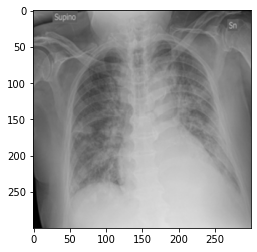

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[2:31:3]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 147, 147, 32)


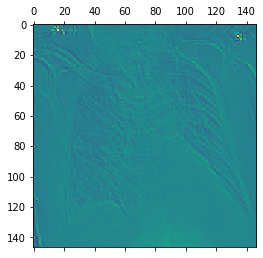

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

batch_normalization
batch_normalization_1
batch_normalization_2
conv2d_3
conv2d_4
max_pooling2d_1
activation_8
batch_normalization_6
activation_9
conv2d_7


True

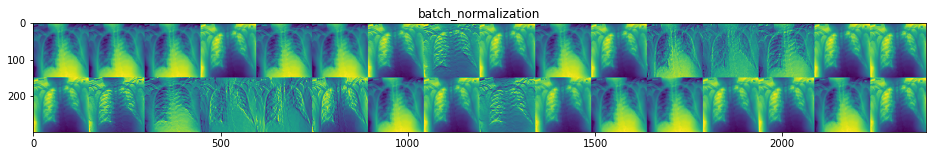

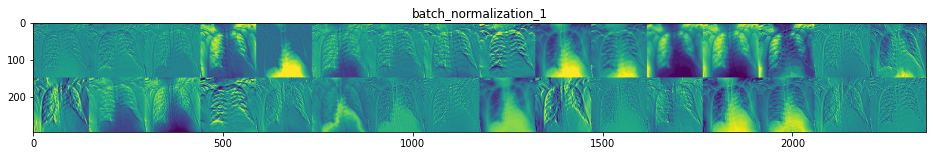

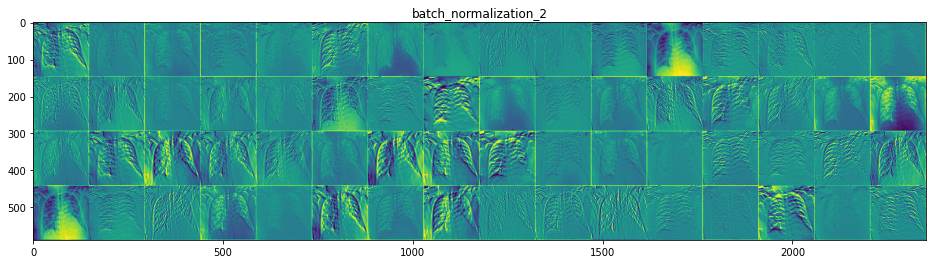

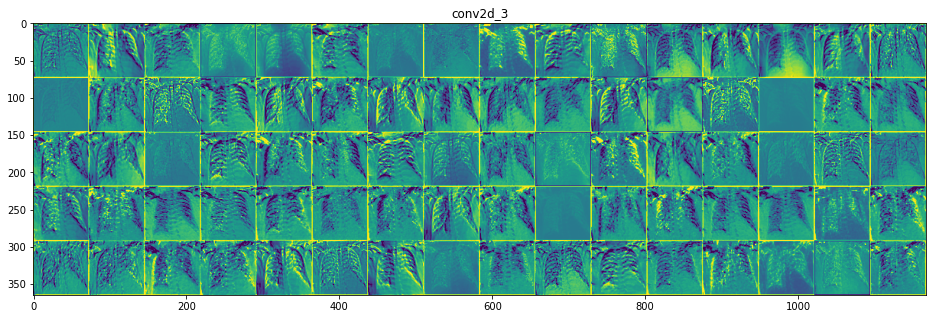

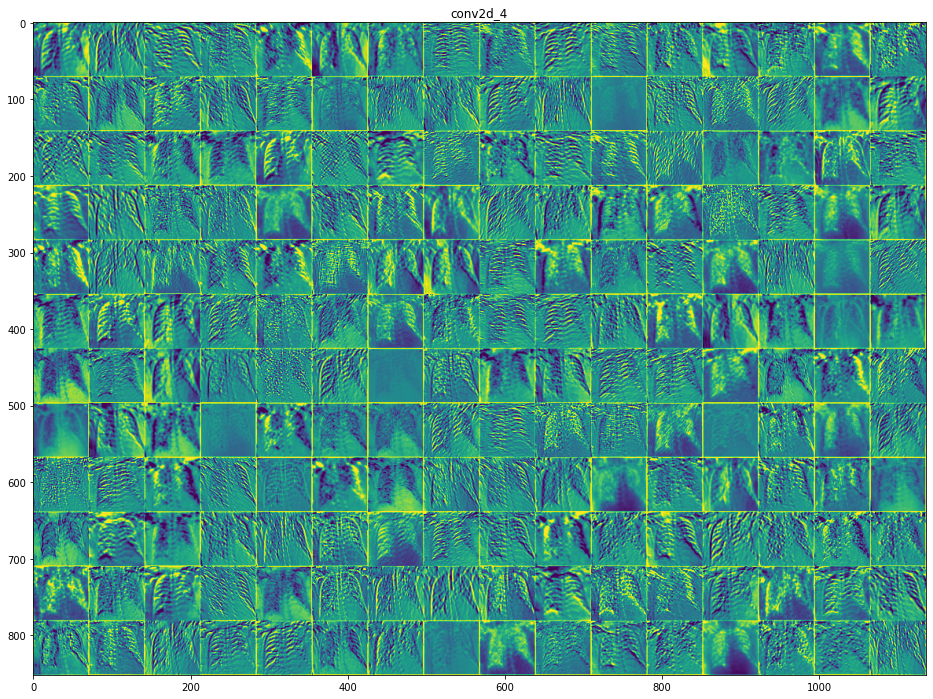

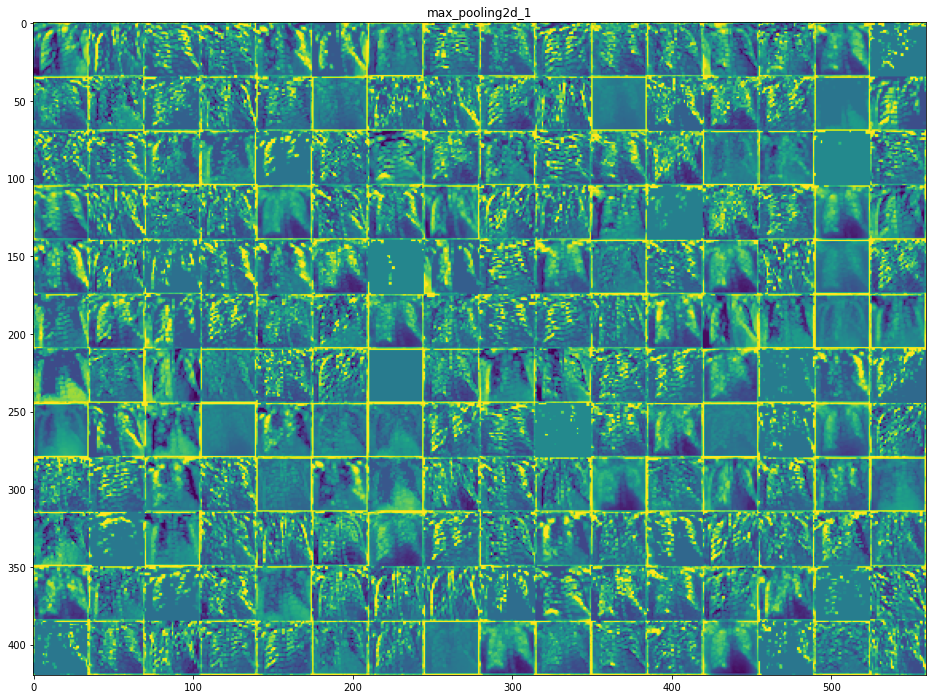

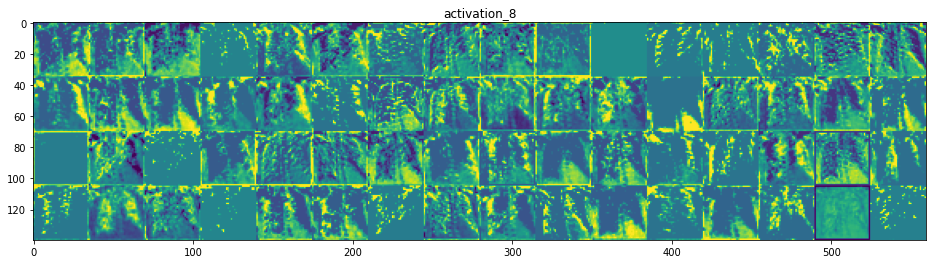

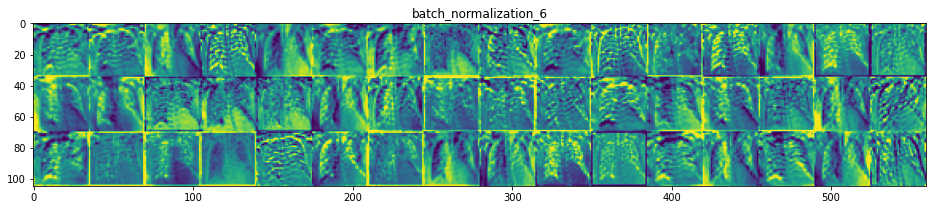

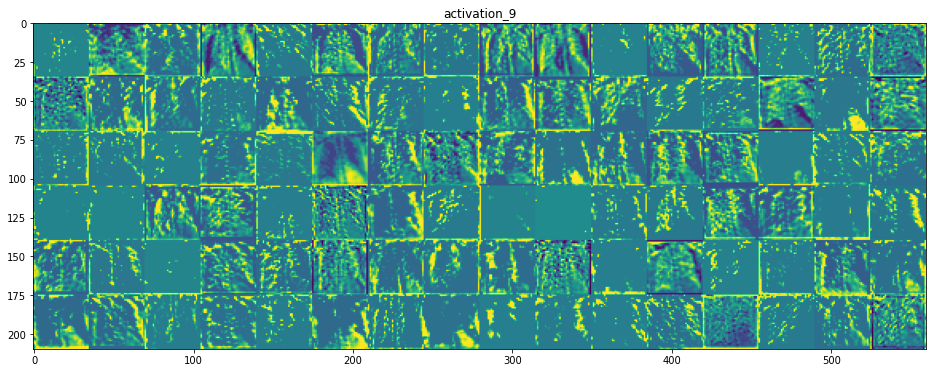

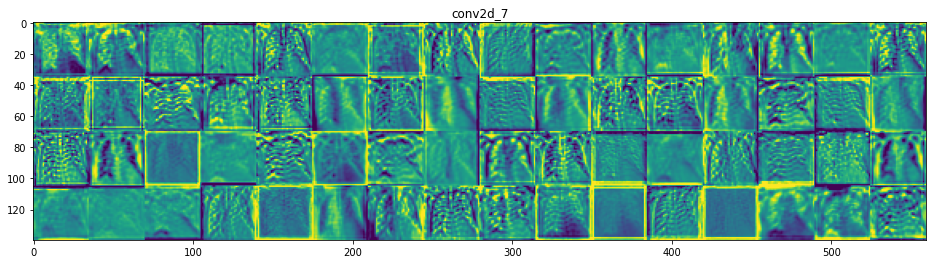

In [ ]:
layer_names = []

for layer in model.layers[2:31:3]:
  layer_names.append(layer.name)
  print(layer.name)

images_per_row = 16
actImgs = []

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  # if n_cols == 0: n_cols = 1 
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  width = scale * display_grid.shape[1]
  height = scale * display_grid.shape[0]
  if height == 0: height = 1
  plt.figure(figsize=(width, height))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
  plt.savefig('{}.png'.format(layer_name))
  img = cv2.imread('{}.png'.format(layer_name))
  actImgs.append(img)

im_final = cv2.vconcat(actImgs)
cv2.imwrite('./activations.png', im_final)